In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = '/content/drive/MyDrive/yrs/final_asan1.csv'

In [4]:
import re
from textblob import TextBlob
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords

In [5]:
benefits = []
contra = []
asan = []

In [6]:
import csv

with open(data,'r') as file:
  reader = csv.reader(file)
  for row in reader:
    benefits.append(row[5])
    contra.append(row[6])
    asan.append(row[1])

In [7]:
input_1=[]
input_2=[]
output=[]
data = []

In [8]:
for i in range (len(benefits)):
  line = benefits[i]
  line = line.lower()
  line = re.sub(r'[^A-Za-z\n]+', ' ', line)
  line = remove_stopwords(line)
  line = line.replace("benefits","")
  input_1.append(line)
  data.append(line)
  line = contra[i]
  line = line.lower()
  line = re.sub(r'[^A-Za-z\n]+', ' ', line)
  line = remove_stopwords(line)
  line = line.replace("contra","")
  line = line.replace("indications","")
  input_2.append(line)
  data.append(line)
  line = asan[i]
  line = line.replace(" ","")
  output.append(line)

In [9]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from keras.utils import np_utils
from tensorflow import keras
import keras.backend as K
import numpy as np

oov_token = "<OOV>"
embed_size = 20

In [10]:
tokenizer = Tokenizer(oov_token=oov_token)
tokenizer.fit_on_texts(data)
word_index = tokenizer.word_index
sequence = tokenizer.texts_to_sequences(data)

print(len(word_index))

2349


In [11]:
vocab_size = len(word_index)

In [12]:
index_to_word_map = {}
for word,index in word_index.items():
  index_to_word_map[index] = word

In [13]:
print('Vocabulary Sample:', list(word_index.items()))

Vocabulary Sample: [('<OOV>', 1), ('asana', 2), ('practice', 3), ('people', 4), ('muscles', 5), ('blood', 6), ('body', 7), ('pressure', 8), ('organs', 9), ('high', 10), ('practise', 11), ('abdominal', 12), ('heart', 13), ('asanas', 14), ('suffering', 15), ('helps', 16), ('strengthens', 17), ('practised', 18), ('sciatica', 19), ('balance', 20), ('tones', 21), ('legs', 22), ('energy', 23), ('problems', 24), ('nerves', 25), ('spine', 26), ('hernia', 27), ('arms', 28), ('mudra', 29), ('nervous', 30), ('stimulates', 31), ('neck', 32), ('conditions', 33), ('improves', 34), ('meditation', 35), ('slipped', 36), ('disc', 37), ('lower', 38), ('position', 39), ('spinal', 40), ('forward', 41), ('mind', 42), ('stretches', 43), ('inverted', 44), ('right', 45), ('pelvic', 46), ('variation', 47), ('performed', 48), ('knees', 49), ('pose', 50), ('develops', 51), ('digestive', 52), ('bending', 53), ('shoulders', 54), ('postures', 55), ('brain', 56), ('pregnancy', 57), ('especially', 58), ('perform', 59)

In [14]:
print(index_to_word_map[2349])

performing


In [15]:
len(sequence)

476

In [16]:
tokenizer2 = Tokenizer(oov_token=oov_token)
tokenizer2.fit_on_texts(output)
word_index2 = tokenizer2.word_index
sequence2 = tokenizer2.texts_to_sequences(output)

print(len(word_index2))

239


In [17]:
print('Vocabulary Sample:', list(word_index2.items()))

Vocabulary Sample: [('<OOV>', 1), ('aname', 2), ('abdominalbreathing', 3), ('advasana', 4), ('agnisarakriya', 5), ('akarnadhanurasana', 6), ('akashimudra', 7), ('anandamadirasana', 8), ('ardhachandrasana', 9), ('ardhamatsyendrasana', 10), ('ardhapadmahalasana', 11), ('ardhapadmasana', 12), ('ardhashalabhasana', 13), ('ardhatitaliasana', 14), ('ardhaushtrasanaenero', 15), ('ashwasanchalanasana', 16), ('ashwinimudra', 17), ('astavakrasana', 18), ('baddhapadmasana', 19), ('bakadhyanasana', 20), ('bakasana', 21), ('bandhahastautthanasana', 22), ('bhadrasana', 23), ('bhairavamudra', 24), ('bhastrikapranayama', 25), ('bhoocharimudra', 26), ('bhramaripranayama', 27), ('bhunamanasana', 28), ('bhujangasana', 29), ('bhujanginimudra', 30), ('bhumipadamastakasana', 31), ('brahmacharyasana', 32), ('chakkichalanasana', 33), ('chakrasana', 34), ('chandranamaskara', 35), ('chinmudra', 36), ('dakshinanauli', 37), ('dhanurakarshanasana', 38), ('dhanurasana', 39), ('dhyanaveerasana', 40), ('dolasana', 41

In [18]:
vocab_size2 = len(word_index2)

In [19]:
index_to_word_map2 = {}
for word,index in word_index2.items():
  index_to_word_map2[index] = word

In [20]:
index_to_word_map2[3]

'abdominalbreathing'

In [21]:
benefits = []
contra = []
asan = []

In [22]:
for i in range (2,len(sequence)):
  if i%2==0:
    benefits.append(sequence[i])
  else:
    contra.append(sequence[i])

for i in range (1,len(sequence2)):
  asan.append(sequence2[i])

In [23]:
max_len_benefits=0
max_len_contra=0
for i in range (len(benefits)):
  if len(benefits[i])>max_len_benefits:
    max_len_benefits = len(benefits[i])
  if len(contra[i])>max_len_contra:
    max_len_contra = len(contra[i])
print(max_len_benefits)
print(max_len_contra)

480
119


In [24]:
benefits = pad_sequences(benefits,max_len_benefits,padding='post')
contra = pad_sequences(contra,max_len_contra,padding='post')

In [25]:
np.shape(benefits[i])

(480,)

In [26]:
benefits = np.array(benefits)
contra = np.array(contra)
asan = np.array(asan)

In [27]:
np.shape(contra)
np.shape(asan)

(237, 1)

In [28]:
first_input = keras.Input(shape=(480),name="Benefits")
second_input = keras.Input(shape=(119),name="Contra-indications")
first_hidden = keras.layers.Embedding(vocab_size+1,embed_size)(first_input)
second_hidden = keras.layers.Embedding(vocab_size+1,embed_size)(second_input)
first_combined = keras.layers.Lambda(lambda x: K.mean(x, axis=1), output_shape=(1,embed_size))(first_hidden)
second_combined = keras.layers.Lambda(lambda x: K.mean(x, axis=1), output_shape=(1,embed_size))(second_hidden)
hidden_input = keras.layers.concatenate([first_combined,second_combined])
output = keras.layers.Dense(vocab_size2,activation='softmax',name="recommendor")(hidden_input)

model = keras.Model(inputs = [first_input,second_input],
                    outputs = [output])


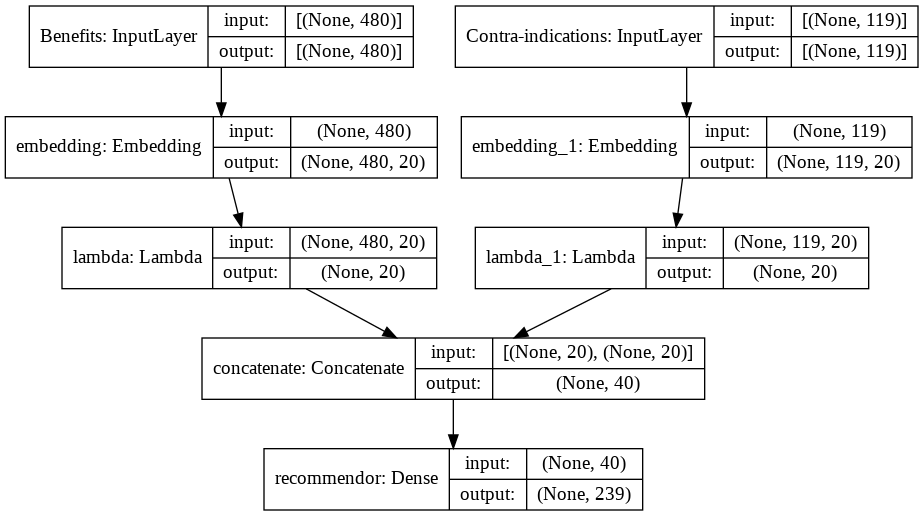

In [29]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [30]:
model.compile(
    optimizer='adam',
    loss = [tf.keras.losses.SparseCategoricalCrossentropy()],
    loss_weights=[1.0],
)

In [31]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Benefits (InputLayer)           [(None, 480)]        0                                            
__________________________________________________________________________________________________
Contra-indications (InputLayer) [(None, 119)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 480, 20)      47000       Benefits[0][0]                   
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 119, 20)      47000       Contra-indications[0][0]         
______________________________________________________________________________________________

In [32]:
asan= np.subtract(asan,1)

In [33]:
history = model.fit(
    {"Benefits" : benefits, "Contra-indications" : contra},
    {"recommendor":asan},
    epochs=1000,
    batch_size=32,
)

Epoch 1/1000
8/8 [==============================] - 1s 6ms/step - loss: 5.4800
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 5.4770
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 5.4764
Epoch 4/1000
8/8 [==============================] - 0s 5ms/step - loss: 5.4758
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 5.4753
Epoch 6/1000
8/8 [==============================] - 0s 6ms/step - loss: 5.4747
Epoch 7/1000
8/8 [==============================] - 0s 4ms/step - loss: 5.4742
Epoch 8/1000
8/8 [==============================] - 0s 5ms/step - loss: 5.4737
Epoch 9/1000
8/8 [==============================] - 0s 5ms/step - loss: 5.4732
Epoch 10/1000
8/8 [==============================] - 0s 4ms/step - loss: 5.4726
Epoch 11/1000
8/8 [==============================] - 0s 5ms/step - loss: 5.4720
Epoch 12/1000
8/8 [==============================] - 0s 4ms/step - loss: 5.4714
Epoch 13/1000
8/8 [==============================

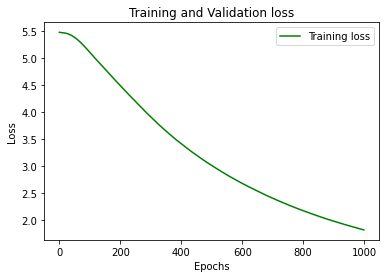

In [34]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [64]:
model(
    benefits[6],
    contra[6]
)

ValueError: ignored

In [43]:
weights = model.get_layer('embedding_1').get_weights()[0]

In [44]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = index_to_word_map[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [45]:
try:
  from google.colab import files
  files.download('vecs.tsv')
  files.download('meta.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
benefits[7]

array([  2, 439,  43,   5,  89, 868,   5,  21,  25,  26, 118,   5, 112,
       110, 523, 157, 650, 869, 372, 651, 196, 278, 440,  24, 870, 871,
        62,  12,   9, 317,  52, 102, 197, 279, 177, 159,  97, 198, 103,
       150,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   